In [29]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import numpy as np
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA
import matplotlib.pyplot as plt

# Plot dei separazione

In [2]:

fig, ax = plt.subplots()

total = 0
for p in range(0,num_cluster):
    total += m_separation[:,:,p]

mean_separation = total/num_cluster
image = ax.imshow(total)


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,total.shape[0]):
    for j in range(0,total.shape[1]):
        c = np.round(total[i,j],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

# Caricamento della resa 

In [3]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

# Pulizia dei dati

In [4]:
allPixelNDVIPoly = allPixelNDVIPoly[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

# Creazione formato dato per sklearn

In [8]:
DataGrid = FDataGrid(data_matrix=allPixelNDVIPoly,grid_points=range(len(allPixelNDVIPoly[0])))

In [22]:
fpca = FPCA(n_components=2)
FPCAscores = np.array(fpca.fit_transform(DataGrid))

In [30]:
print(FPCAscores)
print(len(newResa3))
print(len(allPixelNDVIPoly))
print(len(FPCAscores))

[[ 0.30542031  0.86851136]
 [ 0.45078095  0.41362709]
 [ 0.49024627  0.20122018]
 ...
 [ 0.31860066 -0.07899767]
 [ 0.54410896  0.01434716]
 [ 0.58904178  0.20231863]]
1471
1471
1471


1471


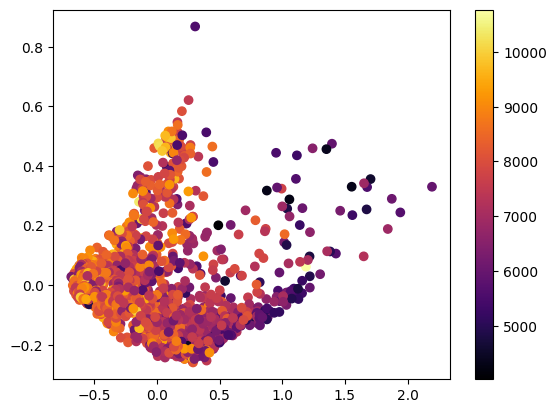

In [43]:
print(len(FPCAscores[:,0]))

fig, ax = plt.subplots()
scatter = ax.scatter(FPCAscores[:,0], FPCAscores[:,1],c=newResa3,cmap='inferno')
fig.colorbar(scatter)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")